#### Objective
A response model can provide a significant boost to the efficiency of a marketing campaign by 
increasing responses or reducing expenses. 

The objective is to predict who will respond to an offer for a product or service AND 
to train a predictive model which allows the company to maximize the profit of the next marketing campaign.


#### Variables

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise <br>
- Complain - 1 if customer complained in the last 2 years <br>
- DtCustomer - date of customer’s enrolment with the company <br>
- Education - customer’s level of education <br>
- Marital - customer’s marital status <br>
- Kidhome - number of small children in customer’s household <br>
- Teenhome - number of teenagers in customer’s household <br>
- Income - customer’s yearly household income <br>
- MntFishProducts - amount spent on fish products in the last 2 years <br>
- MntMeatProducts - amount spent on meat products in the last 2 years <br>
- MntFruits - amount spent on fruits products in the last 2 years <br>
- MntSweetProducts - amount spent on sweet products in the last 2 years <br>
- MntWines - amount spent on wine products in the last 2 years <br>
- MntGoldProds - amount spent on gold products in the last 2 years <br>
- NumDealsPurchases - number of purchases made with discount <br>
- NumCatalogPurchases - number of purchases made using catalogue <br>
- NumStorePurchases - number of purchases made directly in stores <br> 
- NumWebPurchases - number of purchases made through company’s web site <br>
- NumWebVisitsMonth - number of visits to company’s web site in the last month <br>
- Recency - number of days since the last purchase <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from IPython.display import display
import plotly.io as pio
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, LabelEncoder

In [2]:
df = pd.read_csv('/kaggle/input/arketing-campaign/marketing_campaign.csv', sep = ';', )

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### Step 1. Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df['ID'].duplicated().sum()
df1 = df.drop(columns = ['ID'])

duplicates = df1[df1.duplicated(keep = False)]
duplicates_sorted = duplicates.sort_values(by= duplicates.columns.tolist())
duplicates_sorted

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
39,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,...,6,1,0,0,0,0,0,3,11,1
894,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,...,6,1,0,0,0,0,0,3,11,1
17,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,...,7,0,0,0,0,0,0,3,11,0
282,1946,Graduation,Together,37760.0,0,0,2012-08-31,20,84,5,...,7,0,0,0,0,0,0,3,11,0
182,1946,Master,Married,66835.0,0,0,2013-09-28,21,620,26,...,2,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,1992,Graduation,Married,34935.0,0,0,2013-06-21,71,34,4,...,7,0,0,0,0,0,0,3,11,0
392,1993,Graduation,Single,74293.0,0,0,2014-05-04,66,375,152,...,2,0,0,0,0,0,0,3,11,0
928,1993,Graduation,Single,74293.0,0,0,2014-05-04,66,375,152,...,2,0,0,0,0,0,0,3,11,0
696,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,2,...,6,0,0,0,0,0,0,3,11,0


ID를 제외한 모든 변수들이 같다면, 단순 중복이라고 생각하고 중복을 제거한다

In [6]:
df2 = df1.drop_duplicates()
df2[df2['Income'].isna()].head()
print(df2['Marital_Status'].unique())
print(df2['Education'].unique())

df2[df2['Marital_Status'] == 'Absurd']
df2['Education'] = df2['Education'].replace({'2n Cycle' : "Master"}) 
df3 = df2.drop(df2[df2['Marital_Status'] == 'Absurd'].index)
df4 = df3.drop(df2[df2['Income'].isna()].index)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


<ipython-input-6-256f9e3b6fb8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Education'] = df2['Education'].replace({'2n Cycle' : "Master"})


Absurd는 의미 없는 값일 가능성이 높다. Basic은 고등학교 교육 수준 이하, 2n Cycle은 유럽에서 쓰이는 석사학위 수준<br>
Absurd로 표기한 사람이 2명밖에 안되므로 삭제하도록 한다
<br>
2n Cycle과 Master는 같은 석사 학위이므로 Master로 합친다

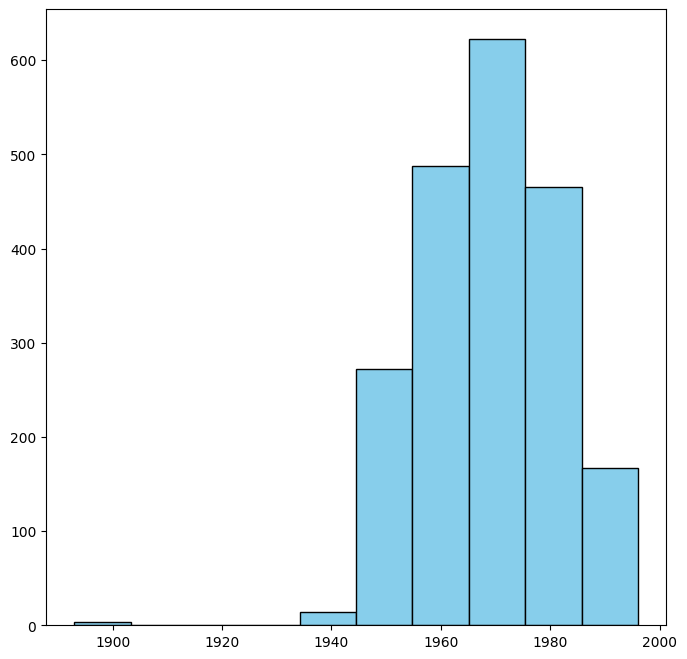

In [7]:
plt.figure(figsize = (8,8))
plt.hist(df4['Year_Birth'], edgecolor = 'black', color = 'skyblue')
plt.show()

In [8]:
df4[df4['Year_Birth'] < 1930]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,5,0,0,0,0,0,1,3,11,0
239,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,0,...,4,0,0,0,0,0,0,3,11,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,1,0,0,1,0,0,0,3,11,0


In [9]:
df4['Dt_Customer'] = pd.to_datetime(df4['Dt_Customer'])
df4['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

이 데이터는 2014년에 publish된 데이터인데, 1900년 이전에 출생했다는 것은 연세가 최소 114세 이상, 최대 121세이라는 뜻이다. 기네스북에 등재된 인간의 최대 수명이 122세임을 고려했을 때, 신뢰성이 부족하므로 삭제하도록 한다

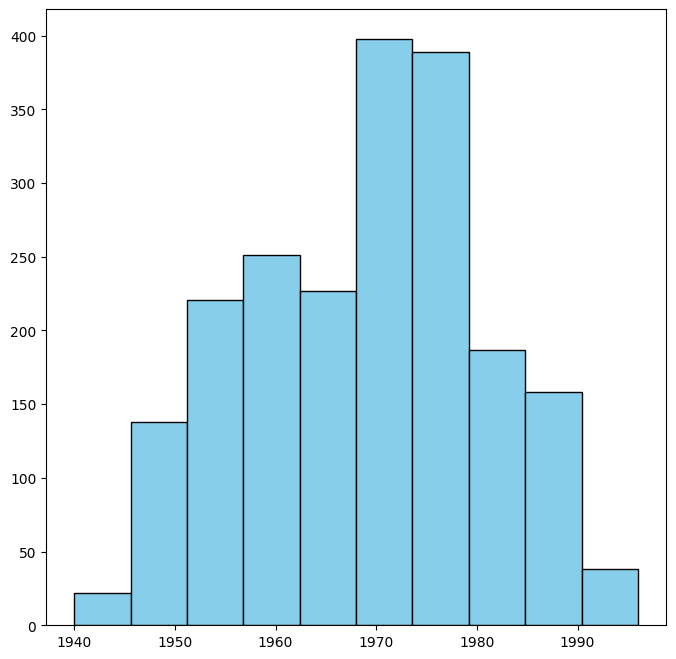

In [10]:
df5 = df4[df4['Year_Birth'] > 1930]
plt.figure(figsize = (8,8))
plt.hist(df5['Year_Birth'], edgecolor = 'black', color = 'skyblue' )
plt.show()

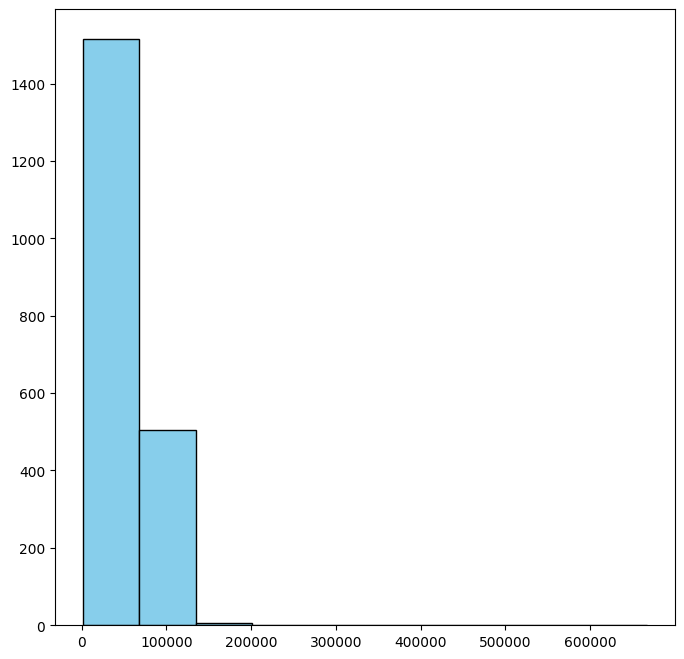

In [11]:
plt.figure(figsize = (8,8))
plt.hist(df5['Income'], edgecolor = 'black', color = 'skyblue' )
plt.show()

In [12]:
df5[df5['Income'] >180000]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,6,0,0,0,0,0,0,3,11,0


66만 달러는 2014년 기준 약 74억으로, 37세에 이만한 수익을 올렸다고 보기엔 신뢰성이 떨어진다. 또한 수익이 단순히 666666이라고 적힌 것 역시 신뢰성을 떨어뜨린다. 앞으로의 분석 과정에서 이상치로 인한 왜곡현상이 일어날 수 있으므로 삭제하도록 한다

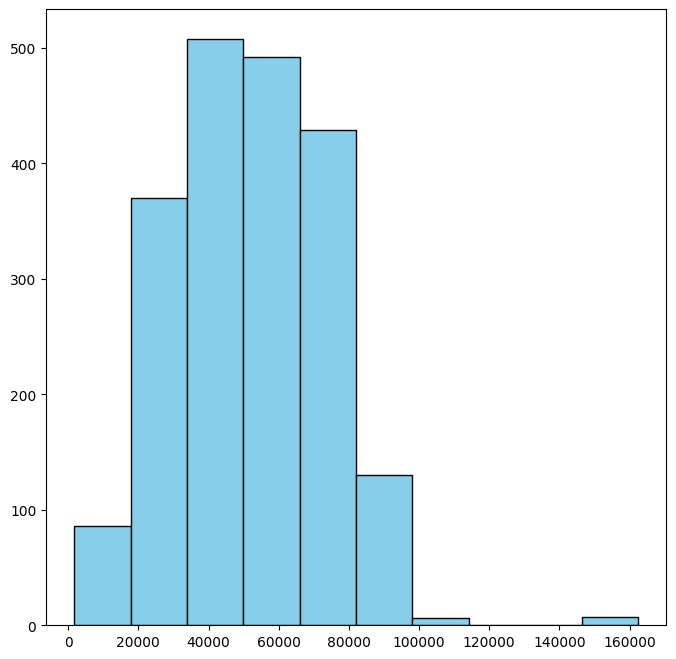

In [13]:
df6 = df5[df5['Income'] <180000]
plt.figure(figsize = (8,8) )
plt.hist(df6['Income'], edgecolor = 'black', color = 'skyblue')
plt.show()

In [14]:
df6['Z_Revenue'].unique()
df6['Z_CostContact'].unique()
df7 = df6.drop(columns = ['Z_Revenue', 'Z_CostContact'])

Z_Revenue, Z_CostContact는 변수설명에 나와있지도 않고, 모두가 같은 값이다. 삭제하도록 한다

In [15]:
for col in df7.columns:
    if col in ['Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']:
        print(df7[col].unique())

[0 1 2]
[0 1 2]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


In [16]:
for col in df7.columns:
    if col in ['Dt_Customer', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:
        print('{}, Min : {}, Max : {}'.format(col, df7[col].min(), df7[col].max()))


Dt_Customer, Min : 2012-07-30 00:00:00, Max : 2014-06-29 00:00:00
Recency, Min : 0, Max : 99
MntWines, Min : 0, Max : 1493
MntFruits, Min : 0, Max : 199
MntMeatProducts, Min : 0, Max : 1725
MntFishProducts, Min : 0, Max : 259
MntSweetProducts, Min : 0, Max : 262
MntGoldProds, Min : 0, Max : 321
NumDealsPurchases, Min : 0, Max : 15
NumWebPurchases, Min : 0, Max : 27
NumCatalogPurchases, Min : 0, Max : 28
NumStorePurchases, Min : 0, Max : 13
NumWebVisitsMonth, Min : 0, Max : 20


MntMeatProducts와 MntWines의 경우 Max 값이 조금 커 보인다. 자세히 확인해보자

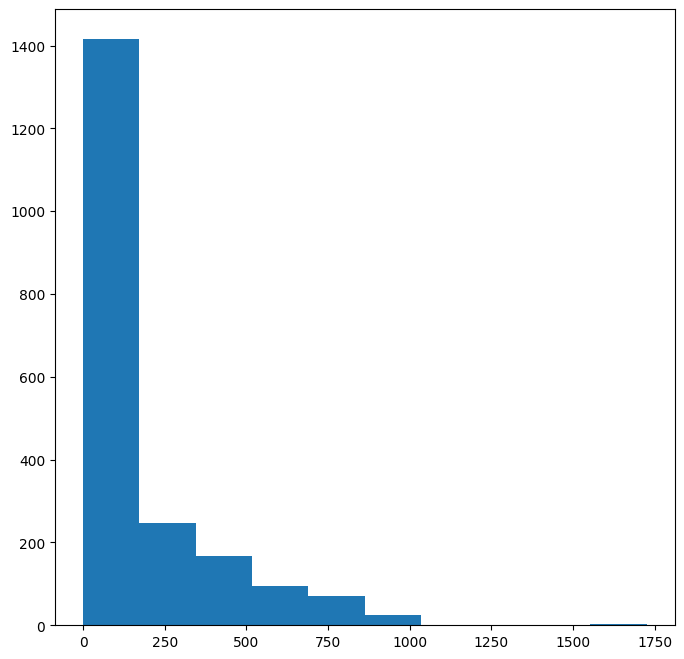

In [17]:
plt.figure(figsize = (8,8))
plt.hist(df7['MntMeatProducts'])
plt.show()

In [18]:
df7[df7['MntMeatProducts'] > 1000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
21,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,...,28,0,1,0,0,0,0,0,0,0
164,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,22,0,0,0,0,0,0,0,0,0
687,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,28,1,0,0,0,0,0,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,28,0,1,0,0,0,0,0,0,0


남들 보다 고기 소비량이 많은 가정이 4군데 있으나, 이상치로 규정하고 삭제하기엔 무리가 있어보여 삭제하지 않고 넘어가자

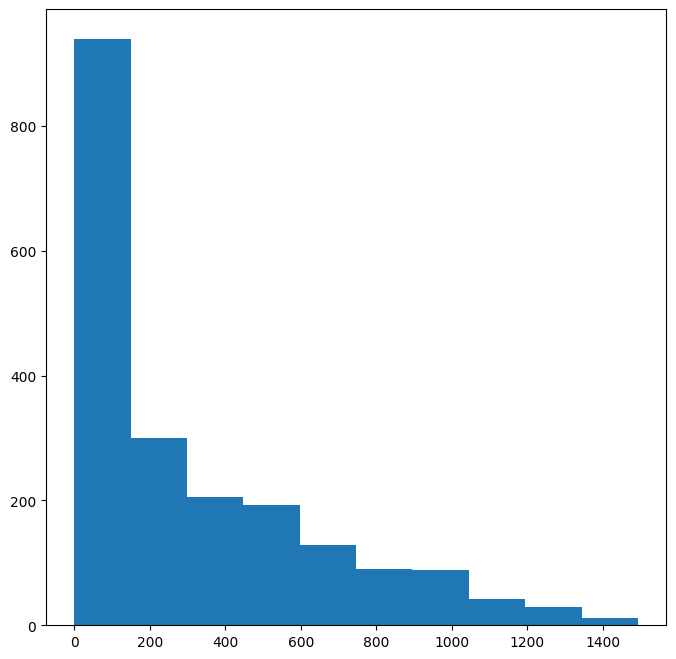

In [19]:

plt.figure(figsize = (8,8))
plt.hist(df7['MntWines'])
plt.show()

Age 변수를 추가하되, 생일을 모르므로 그냥 현재년도 (2014년) - 출생년도로 계산한다

In [20]:
df7['Age'] = 2014 - df7['Year_Birth']
df8 = df7.drop(columns = 'Year_Birth')
df8.groupby('Marital_Status').size().reset_index(name = 'count')

,Marital_Status,count
0,Alone,3
1,Divorced,215
2,Married,788
3,Single,438
4,Together,512
5,Widow,70
6,YOLO,2


In [21]:
print(df8['Marital_Status'].unique())
df9 = df8[df8['Marital_Status'] != 'YOLO']
df9['Marital_Status'] = df9['Marital_Status'].replace({ 'Alone' : 'Single', 'Divorced' : 'Single', \
                                                       'Single' : 'Single', 'Widow' : 'Single', \
                                                      'Married' : 'Couple', 'Together' : 'Couple'})

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'YOLO']


<ipython-input-21-8d6da8e91e8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['Marital_Status'] = df9['Marital_Status'].replace({ 'Alone' : 'Single', 'Divorced' : 'Single', \


YOLO는 현재 혼자 사는지, 배우자와 함께 하는지 알 수가 없으므로 데이터에서 제외.
Married와 Together는 배우자와 함께 하는 경우이므로 Couple로, 나머지는 소득원이 혼자이므로 Single로 재분류

### Step 2. EDA

1. Education, Marital Status, Age, Kidhome, Teenhome을 독립변수로 Income을 예측할 수 있는가?
2. 각 독립변수와 Income의 상관관계
3. 각 캠페인의 반응 비율을 기준으로, 고객을 세분화

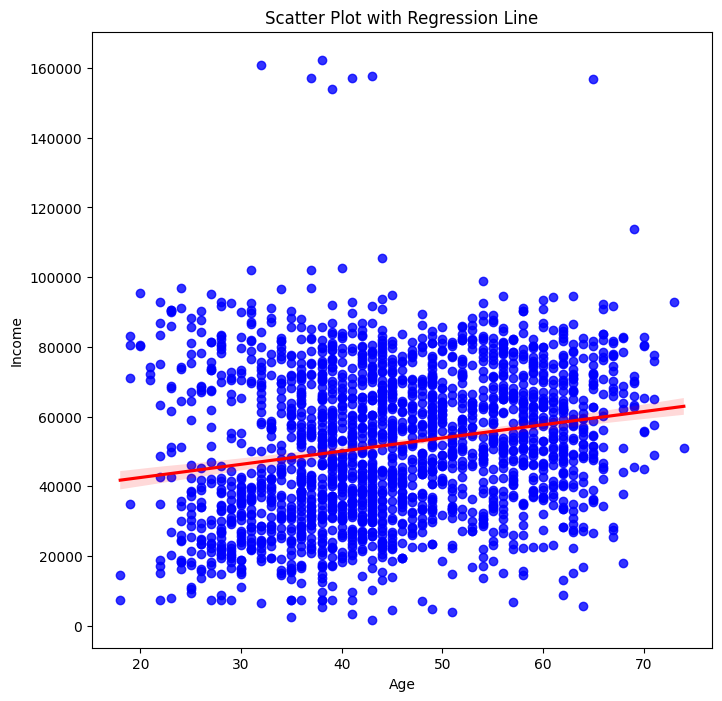

In [22]:
plt.figure(figsize=(8, 8))
sns.regplot(x = 'Age', y = 'Income', data = df9, scatter_kws = {'color' : 'blue'}, line_kws = {'color' : 'red'})
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot with Regression Line')
plt.show()

In [23]:
x = df9['Age']
y = df9['Income']

coefficients = np.polyfit(x, y, 1)
print('Slope : {}, Intercept : {}'.format(coefficients[0], coefficients[1]))


minmaxscaler  = MinMaxScaler()
standardscaler = StandardScaler()


x_normalized = minmaxscaler.fit_transform(df9[['Age']])
y_normalized = minmaxscaler.fit_transform(df9[['Income']])
lr_model = LinearRegression()

lr_model.fit(x_normalized, y_normalized)

slope = lr_model.coef_[0][0]
print(f'MinMaxScaled Slope : {slope}')


x_standard = standardscaler.fit_transform(df9[['Age']])
y_standard = standardscaler.fit_transform(df9[['Income']])
lr_model_2 = LinearRegression()
lr_model_2.fit(x_standard, y_standard)
print('Standardized Slope: {}'.format(lr_model_2.coef_[0][0]))

Slope : 378.3820338354348, Intercept : 34960.05390917211
MinMaxScaled Slope : 0.13188392074778496
Standardized Slope: 0.20425555513350413


In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, \
StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import plotly.express as px


In [25]:
bins = [0, 15000, 30000, 45000, 60000, 75000, 100000, 300000 ] 
labels = ['0-15k', '15k-30k', '30k-45k', '45k-60k', '60k-75k', '75k-100k','100k+']
df9['Income_Range'] = pd.cut(df9['Income'], bins = bins, labels = labels, right = False)
df_grouped = df9.groupby(['Income_Range', 'Education']).size().reset_index(name = 'Count')
df_grouped['Percent'] = df_grouped.groupby('Income_Range')['Count'].transform(lambda x : x/ x.sum())
df_grouped

<ipython-input-25-b9a168770f66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['Income_Range'] = pd.cut(df9['Income'], bins = bins, labels = labels, right = False)
<ipython-input-25-b9a168770f66>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df9.groupby(['Income_Range', 'Education']).size().reset_index(name = 'Count')
<ipython-input-25-b9a168770f66>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

,Income_Range,Education,Count,Percent
0,0-15k,Basic,11,0.215686
1,0-15k,Graduation,20,0.392157
2,0-15k,Master,15,0.294118
3,0-15k,PhD,5,0.098039
4,15k-30k,Basic,36,0.125874
5,15k-30k,Graduation,153,0.534965
6,15k-30k,Master,71,0.248252
7,15k-30k,PhD,26,0.090909
8,30k-45k,Basic,2,0.004158
9,30k-45k,Graduation,239,0.496881


In [26]:


pio.renderers.default = "colab"  

fig = px.bar(
    df_grouped,
    x = 'Income_Range',
    y = 'Percent',
    color = 'Education',
    title = 'Income Range Share by Education Level',
    labels = {'Percent' : 'Percentage', 'Income_Range' : 'Income Range'},
    text_auto = True,
    hover_data = ['Count']
)


fig.update_layout(barmode = 'stack', yaxis = dict(tickformat = ".0%"))
fig.show()

In [27]:
df9

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Income_Range
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,7,0,0,0,0,0,0,1,57,45k-60k
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,5,0,0,0,0,0,0,0,60,45k-60k
2,Graduation,Couple,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,0,49,60k-75k
3,Graduation,Couple,26646.0,1,0,2014-02-10,26,11,4,20,...,6,0,0,0,0,0,0,0,30,15k-30k
4,PhD,Couple,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,0,33,45k-60k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,...,4,0,0,0,0,0,0,0,28,15k-30k
2235,Graduation,Couple,61223.0,0,1,2013-06-13,46,709,43,182,...,5,0,0,0,0,0,0,0,47,60k-75k
2237,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,217,...,6,0,1,0,0,0,0,0,33,45k-60k
2238,Master,Couple,69245.0,0,1,2014-01-24,8,428,30,214,...,3,0,0,0,0,0,0,0,58,60k-75k


In [28]:
bins = [18, 25, 33, 49, 65, 75]
labels = ['18-24', '25-32', '33-48', '49-64', '65+']

df9['Age_Group'] = pd.cut(df9['Age'], bins = bins, labels = labels, right  = False )


<ipython-input-28-bfb73303bd19>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor,\
GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRegressor


df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

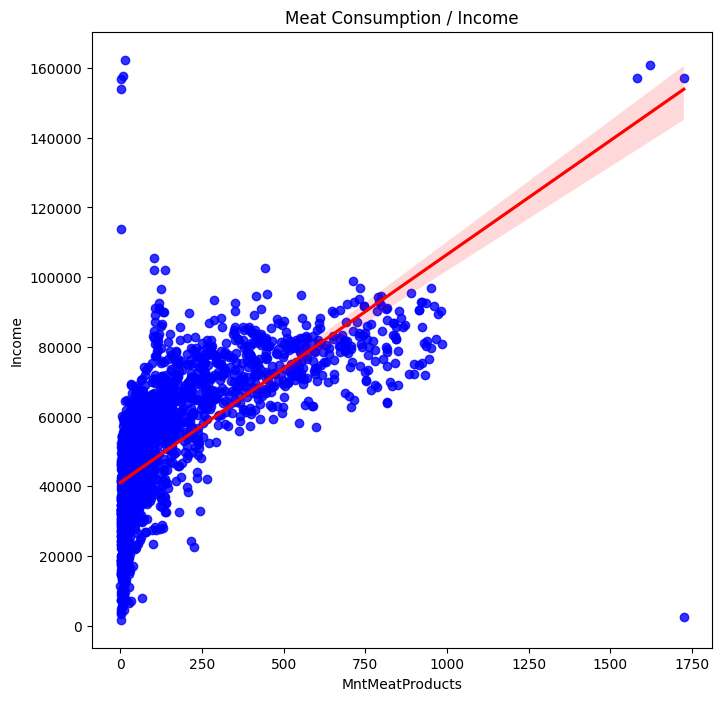

In [30]:
plt.figure(figsize = (8,8))
sns.regplot(
    x = 'MntMeatProducts',
    y= 'Income',
    data = df9,
    scatter_kws = {'color' : 'blue'},
    line_kws = {'color' : 'red'}
)
plt.title('Meat Consumption / Income')
plt.show()

In [31]:
print(df9[df9['Marital_Status'] == 'Single']['Income'].describe() )
print('='*20)
print(df9[df9['Marital_Status'] == 'Couple']['Income'].describe() )

count       726.000000
mean      52084.477961
std       21473.168667
min        1730.000000
25%       35790.250000
50%       50757.000000
75%       68789.500000
max      153924.000000
Name: Income, dtype: float64
count      1300.000000
mean      51995.232308
std       21681.676789
min        2447.000000
25%       35191.500000
50%       52032.500000
75%       68143.500000
max      162397.000000
Name: Income, dtype: float64


In [32]:
lr = LinearRegression()
minmax_scaler = MinMaxScaler()
consumption_list = ['Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age']

effective_col= []
for col in consumption_list:
    x = minmax_scaler.fit_transform(df9[[col]])
    y = minmax_scaler.fit_transform(df9[['Income']])
    lr.fit(x, y)
    
    print('Var: {}, Coefficient : {}'.format(col, lr.coef_[0][0]))
    if abs(lr.coef_[0][0]) >= 0.4:
        effective_col.append(col)

effective_col.append('Income') 

Var: Kidhome, Coefficient : -0.2617234359449519
Var: Teenhome, Coefficient : 0.01821819516979098
Var: Recency, Coefficient : 0.00137479965861147
Var: MntWines, Coefficient : 0.4039025992967533
Var: MntFruits, Coefficient : 0.3384217827126506
Var: MntMeatProducts, Coefficient : 0.7026570549991381
Var: MntFishProducts, Coefficient : 0.3286685687172949
Var: MntSweetProducts, Coefficient : 0.43963899459679007
Var: MntGoldProds, Coefficient : 0.3148625577730763
Var: NumDealsPurchases, Coefficient : -0.11407658628719362
Var: NumWebPurchases, Coefficient : 0.5901502049610392
Var: NumCatalogPurchases, Coefficient : 0.886145755871355
Var: NumStorePurchases, Coefficient : 0.33646874510904434
Var: NumWebVisitsMonth, Coefficient : -0.7127801193281151
Var: Age, Coefficient : 0.13188392074778496


In [33]:
edu_list = ['Basic', 'Graduation', 'Master', 'PhD']


ordinal_encoder = OrdinalEncoder(categories = [edu_list] )
df_encoded = df9[effective_col]
df_encoded[['Education']] = ordinal_encoder.fit_transform(df9[['Education']])

X = df_encoded.drop(columns = ['Income'])
y = df_encoded['Income']


<ipython-input-33-a661bbc90697>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.05, 0.1],
    'max_depth' : [2,3,4]    
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state =1), param_grid, cv= 5, scoring = 'r2', verbose = 1  )
grid_search.fit(X, y)


gbr_df = pd.DataFrame(grid_search.cv_results_)




Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [35]:
gbr_df2= gbr_df.nlargest(3, 'mean_test_score')[['params', 'mean_test_score']]
pd.set_option('display.max_colwidth',None)
gbr_df2

,params,mean_test_score
12,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}",0.782359
2,"{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300}",0.781487
1,"{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}",0.780956


가장 성능이 좋은 xgbr 모델 기반 결측값 채우기

In [36]:
df2 = df1.drop_duplicates()
df2['Education'] = df2['Education'].replace({'2n Cycle' : "Master"}) 
df2 = df2.drop(df2[df2['Marital_Status'] == 'Absurd'].index)
df2 = df2[df2['Year_Birth'] > 1930]
df2['Age'] = 2014 - df2['Year_Birth']
df2 = df2[ (df2['Income'] <180000) | (df2['Income'].isna() )]
df2 = df2.drop(columns = ['Z_Revenue', 'Z_CostContact'])
df2 = df2.drop(columns = 'Year_Birth')
df2 = df2[df2['Marital_Status'] != 'YOLO']
df2['Marital_Status'] = df2['Marital_Status'].replace({ 'Alone' : 'Single', 'Divorced' : 'Single', \
                                                       'Single' : 'Single', 'Widow' : 'Single', \
                                                      'Married' : 'Couple', 'Together' : 'Couple'})
df2 = df2.drop(columns = ['Dt_Customer', 'Recency'])

<ipython-input-36-33016b987662>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning:

invalid value encountered in less



In [37]:

edu_list = ['Basic', 'Graduation', 'Master', 'PhD']
ordinal_encoder = OrdinalEncoder(categories = [edu_list] )
df_encoded = df2[effective_col]
df_encoded[['Education']] = ordinal_encoder.fit_transform(df2[['Education']])


df_with_income = df_encoded[df_encoded['Income'].notna()] 
df_missing_income = df_encoded[df_encoded['Income'].isna()] 
missing_income_index = df_encoded[df_encoded['Income'].isna()].index 



X_missing = df_missing_income.drop(columns = ['Income'])
xgb_model = grid_search.best_estimator_
predicted_income = xgb_model.predict(X_missing)

df2.loc[missing_income_index, 'Income'] = predicted_income
final_df = df2.copy()

<ipython-input-37-ad04da585be9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,4,7,0,0,0,0,0,0,1,57
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,2,5,0,0,0,0,0,0,0,60
2,Graduation,Couple,71613.0,0,0,426,49,127,111,21,...,10,4,0,0,0,0,0,0,0,49
3,Graduation,Couple,26646.0,1,0,11,4,20,10,3,...,4,6,0,0,0,0,0,0,0,30
4,PhD,Couple,58293.0,1,0,173,43,118,46,27,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,Graduation,Single,26816.0,0,0,5,1,6,3,4,...,3,4,0,0,0,0,0,0,0,28
2235,Graduation,Couple,61223.0,0,1,709,43,182,42,118,...,4,5,0,0,0,0,0,0,0,47
2237,Graduation,Single,56981.0,0,0,908,48,217,32,12,...,13,6,0,1,0,0,0,0,0,33
2238,Master,Couple,69245.0,0,1,428,30,214,80,30,...,10,3,0,0,0,0,0,0,0,58


수익 최적화하기

In [38]:
from sklearn.metrics import make_scorer, confusion_matrix
edu_list = ['Basic', 'Graduation', 'Master', 'PhD']
marital_list = ['Single', 'Couple']

ordinal_encoder = OrdinalEncoder(categories = [edu_list, marital_list] )
final_df[['Education', 'Marital_Status']] = ordinal_encoder.fit_transform(final_df[['Education', 
                                                                                 'Marital_Status']])


In [39]:


X = final_df.drop(columns = ['Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain'])
y = final_df['Response']


def revenue_score(y_true, y_pred, cost = 1, profit = 10):
    conf_matrix = confusion_matrix(y_true, y_pred)
    tp = conf_matrix[1,1]
    fp = conf_matrix[0,1]
    revenue = (tp * profit) - ( (tp+fp) * cost)
    return revenue


revenue_scorer = make_scorer(revenue_score, greater_is_better = True)


param_grid = {
    'n_estimators' : [200, 300],
    'learning_rate' : [ 0.1],
    'max_depth' : [2, 3],
    'scale_pos_weight' : [10, 15]
}

grid_search = GridSearchCV(
    XGBClassifier(random_state = 1, use_label_encoder = False),
    param_grid,
    cv = 5,
    scoring = revenue_scorer,
    verbose = 1
)

grid_search.fit(X, y)
best_model = grid_search.best_estimator_

mean_revenue = np.max(grid_search.cv_results_['mean_test_score'])
print(mean_revenue, grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
346.6 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'scale_pos_weight': 15}


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score

# 최적 모델 가져오기
best_model = grid_search.best_estimator_

# Precision & Recall 계산
precision = cross_val_score(best_model, X, y, cv=5, scoring=make_scorer(precision_score))
recall = cross_val_score(best_model, X, y, cv=5, scoring=make_scorer(recall_score))

# 평균값 출력
print(f"Mean Precision: {precision.mean():.4f}")
print(f"Mean Recall: {recall.mean():.4f}")


Mean Precision: 0.2832
Mean Recall: 0.8619


In [55]:
from catboost import CatBoostClassifier

X = final_df.drop(columns = ['Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain'])
y = final_df['Response']


def revenue_score(y_true, y_pred, cost = 1, profit = 10):
    conf_matrix = confusion_matrix(y_true, y_pred)
    tp = conf_matrix[1,1]
    fp = conf_matrix[0,1]
    revenue = (tp * profit) - ( (tp+fp) * cost)
    return revenue


revenue_scorer = make_scorer(revenue_score, greater_is_better = True)


param_grid = {
    'iterations' : [900, 1100, 1300],
    'learning_rate' : [0.1],
    'depth' : [2, 3, 4]
}

grid_search = GridSearchCV(
    CatBoostClassifier(random_state = 1, verbose = 0),
    param_grid,
    cv = 5,
    scoring = revenue_scorer,
    verbose = 1
)

grid_search.fit(X, y)
best_model = grid_search.best_estimator_

mean_revenue = np.max(grid_search.cv_results_['mean_test_score'])
print(mean_revenue, grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
156.0 {'depth': 3, 'iterations': 900, 'learning_rate': 0.1}


In [56]:
from sklearn.linear_model import LogisticRegression


X = final_df.drop(columns = ['Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain'])
y = final_df['Response']

param_grid = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'solver' : ['liblinear', 'lbfgs']
}


grid_search = GridSearchCV(
    LogisticRegression(random_state=1, max_iter=1000),
    param_grid,
    cv=5,
    scoring=revenue_scorer,
    verbose=0
)

grid_search.fit(X, y)
best_model = grid_search.best_estimator_

mean_revenue = np.max(grid_search.cv_results_['mean_test_score'])
print(mean_revenue, grid_search.best_params_)

75.0 {'C': 0.01, 'solver': 'lbfgs'}


프로모션의 비용이 건 당 1달러, 성공했을때의 수익이 10달러일 때:  <br>
평균적으로 프로모션을 진행한 고객들 중 28%의 고객들이 프로모션을 받아들였으며 프로모션을 받아들일 가능성이 있는 고객 중 86%를 커버하였다. 프로모션의 비용과 기대수익에 따라 값을 달리 할 수 있음.

In [71]:
cluster_df = final_df.drop(columns = ['AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'Response' ,'Complain', 'Education', 'MntGoldProds'])


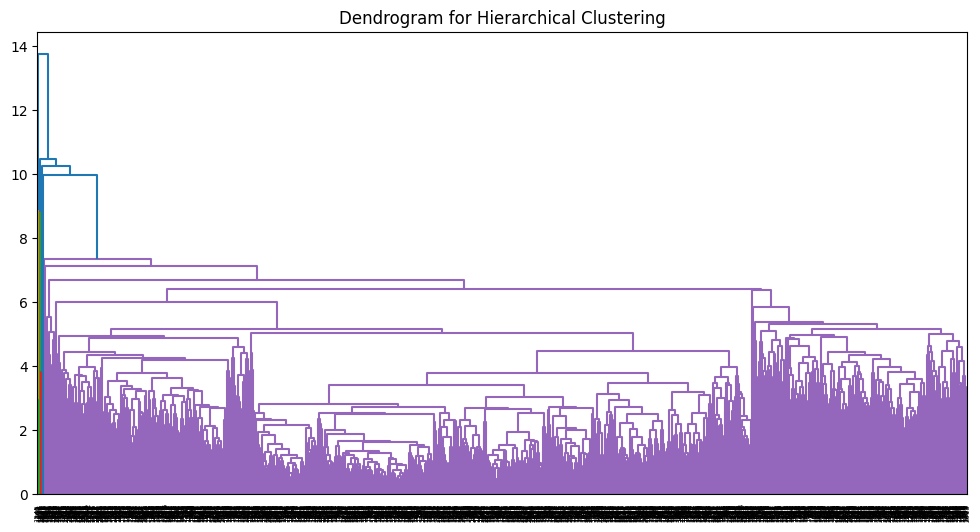

In [66]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# 스케일링 (거리 기반 알고리즘이므로 중요!)
ss_scaler = StandardScaler()
cluster_scaled = ss_scaler.fit_transform(cluster_df)


linkage_matrix = linkage(cluster_scaled, method = 'average')


plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


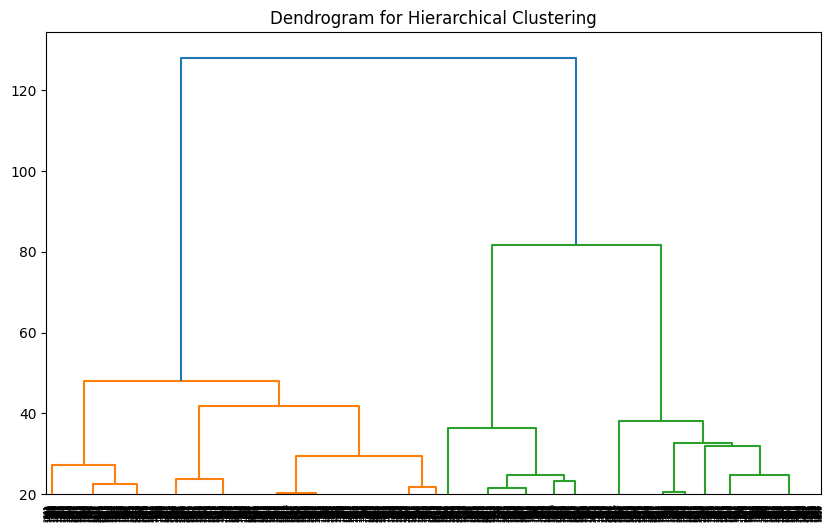

In [72]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
ss_scaler = StandardScaler()
cluster_scaled = ss_scaler.fit_transform(cluster_df)

# 계층적 클러스터링 수행
linkage_matrix = linkage(cluster_scaled, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")

# y축 제한 (10 이하 값 숨기기)
plt.ylim(20, None)  # y=10 아래 부분은 보이지 않도록 설정

plt.show()



single이나 average 등을 사용했을 땐 덴드로그램이 알아보기 힘들게 나오나, ward로 계층적 군집화를 할 시, 적절한 갯수의 군집갯수를 구할 수 있다. 현재 군집의 갯수는 3 - 5개 정도로 나누는게 무난해보인다. 우선 y = 45 정도의 값에서 잘라서 4개의 그룹으로 나누어보자.

In [45]:
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_scaled)

temp_df = final_df.drop(columns = ['AcceptedCmp2', 'Complain'])
cluster_df = cluster_df.merge(temp_df, how = 'inner', on = ['Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age'])
cluster_summary = cluster_df.groupby('Cluster').mean()
cluster_summary


,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.644068,29889.554752,0.877589,0.001883,37.998117,7.048964,30.024482,10.568738,7.043315,2.020716,2.416196,0.551789,3.205273,6.969868,35.331450,0.088512,0.001883,0.000000,0.001883,0.131827
1,0.657588,59886.455889,0.180934,0.959144,531.210117,21.846304,145.994163,30.523346,23.243191,3.739300,6.550584,3.363813,7.963035,5.702335,49.846304,0.068093,0.177043,0.036965,0.046693,0.143969
2,0.607547,76343.797716,0.043396,0.154717,585.052830,69.964151,464.584906,99.526415,73.267925,1.298113,5.186792,5.977358,8.403774,2.790566,45.424528,0.084906,0.109434,0.243396,0.209434,0.281132
3,0.646035,41987.435638,0.694391,0.961315,64.626692,4.117988,24.661509,6.141199,4.214700,2.410058,2.237911,0.721470,3.495164,5.914894,49.938104,0.065764,0.027079,0.000000,0.000000,0.075435


여러 변수 중, 광고에서 신경써야하고 그룹마다 평균값 차이가 큰 변수들을 살펴보자.

1. Marital_Status - 결혼 여부는 중요한 지표이나 그룹마다 차이가 크지 않기에 우선순위에서 제외 <br>
2. **Income - 중요한 지표이며 그룹마다 값이 상이. 우선순위에 포함** 
3. **아이, 청소년 수: 중요한 지표이며 그룹마다 값이 상이. 우선순위에 포함**
4. **와인, 과일, 고기, 생선, 단 음식은 역시나 우선순위 포함**
5. **웹페이지 구매 및 방문횟수, 카탈로그로 구매한 횟수, 상점에서 구매한 횟수 역시 프로모션 경로를 알려주는 지표. 포함시킴** 
6. **나이 역시 포함**

====================================================================================================================



프로모션은 개별화된 맞춤형 프로모션. 경로 및 종류 설정.

각 그룹의 인원 수는 비슷하다. 500명 가량

그룹1과 그룹 4의 경우 둘 다 소득이 하위권에 속하며 식료품 소비량이 적고, 자녀가 1명 이상 있을 가능성이 높다. 또한 웹페이지 방문횟수는 많은 편이지만 실질적인 구매 횟수 역시 적은 편. 나이는 평균 35세 또는 50세.
그룹 2와 3보다 웹페이지 방문횟수가 많으며 프로모션을 이용한 비중이 프로모션3, 프로모션 6을 제외하면 다른 두 그룹에 비해 현저히 낮다. 또한 3, 6은 모든 그룹에게 인기있는 프로모션이었기에 그냥 보편적으로 인기있다고 보는게 타당. 


가정 수립 -

연 수익이 적고 구매 횟수 및 식료품 구매율은 낮으나 웹페이지 방문횟수가 상대적으로 높다 
	 -> 원하는 가격대의 (저렴한) 물품이 없어 쉽게 구매하지 못하고 있고, 그렇기에 웹페이지를 자주 방문한다는 가정을 세우자

전략 수립 

->  기존의 프로모션은 이들의 니즈를 충족시키지 못하고 있다. 기존의 프로모션과 다른 품목을 대상으로 프로모션 진행. 그 다음 해당 물품들에 대한 프로모션을 진행한다. 특히 웹 페이지 방문횟수가 높기에 홈페이지 방문 시 팝업창을 이용해 현재 진행중인 할인 품목에 대해 알려줘보자. 

전략 보완

위의 가정에 따라 새로운 프로모션을 진행하고 이후 고객들의 프로모션에 대한 반응에 따라 보완하도록 한다

예시) 캠페인 3, 6이 가격이 있는 식료품 할인과 관련된 프로모션이라면 이들이 '고급 식료품을 더 구매하고 싶으나 예산을 초과하여 사지 못하는 상황'이라는 가정하에 1. 이들을 대상으로 한 프로모션을 따로 진행하거나 2. 기존의 프로모션을 알리는 정도로 (이메일, 웹페이지 방문시 팝업창 등). 이후 결과를 보고 전략 보완

그룹 2: 수익 중상위권. 10대 자녀 비율 평균 1명. 와인 소비량은 많으나 그 외 식료품은 그룹 1, 4보단 많고 그룹 3보단 적은 편. 카탈로그보단 웹사이트를 통해 구매하는 횟수가 2배 가량 많고  상점에 직접 방문하여 구매하는 횟수도 많음. 방문횟수도 그룹 1,4와 비슷.  나이는 평균 49세. 프로모션 2를 가장 많이 받아들인 그룹이고 나머지는 상대적으로 적음
그룹 1은 비교적 젊은사람들과 나이 어린 자녀들을 위한, 그리고 그룹4는 비교적 나이가 있고 10대 자녀가 있는 경우를 위해 프로모션 진행.

-> 프로모션 4의 결과를 토대로 이들이 원하는 물품 파악.  그와 비슷한 품목을 프로모션 진행. 10대 자녀와 관련된 프로모션도 진행. 경로는 매장과 웹페이지 둘 다. 와인과 관련된거 많이 하기


그룹 3은 수입이 높음. 자녀 거의 없음. 식료품 특히 와인 , 고기에 대한 소비량이 압도적이고 다른 식료품도 많은 편. 웹페이지 방문 적은 편이고 카탈로그, 상점 구매 횟수 높음 (경로). 단, 웹 페이지 구매횟수 많음. 
프로모션 이용률이 가장 많으며 특히 1, 5의 비율이 굉장히 높은 편 (10~24%).

프로모션 경로 + 기존의 인기있는 프로모션을 기반으로 니즈 파악 후 비슷한 품목 프로모션 + 물품의 종류는 소비량 및 자녀의 수를 보고 + 물품의 가격대는 수입을 보고. 
이후 프로모션 결과를 보고 전략 수정 및 보완하는 방향. 
단, 수입이 적은 그룹 -> 가격8대가 있는 물품을 사고 싶은데 할인을 원하는건지, 아니면 이미 저렴한 물품을 더 저렴하게 사고 싶은건지 파악해야함. 특히 기존의 프로모션 데이터를 이용하기 힘들기에 여러 품목들을 대상으로 프로모션 진행한 후 추가 데이터 확보가 중요.

수입이 높은 그룹 -> 기존의 프로모션 데이터를 기반으로 이들이 원하는 물품 파악 후 프로모션 수립. 또한 소비량이 많은 품목 혹은 자녀의 수에 따른 프로모션 전략 수립. 

정리

1. 기존의 프로모션 데이터 이용가능성 살피기
2-1. 없는 경우 -> 가정 수립 후 (저렴한 품목을 더 저렴하게? 가격대가 있는걸 저렴하게?) 프로모션 진행. 추가 데이터 확보 후 전략 수립
2-2 있는 경우 -> 해당 데이터 기반으로 비슷한 항목에 대한 물품을 프로모션 진행
3. 평균 나이 및 자녀의 수에 따른 전략 수립
4. 식료품 소비량에 따른 1. 원래부터 선호하지 않는지, 2. 가격부담때문에 소비하지 않는 것인지 파악 (수입이 적은 그룹의 경우)
5. 카탈로그 오프라인 상점 웹페이지 중 방문 및 구매횟수 많은 경로로 홍보

In [46]:
cluster_summary

,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Response
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.644068,29889.554752,0.877589,0.001883,37.998117,7.048964,30.024482,10.568738,7.043315,2.020716,2.416196,0.551789,3.205273,6.969868,35.331450,0.088512,0.001883,0.000000,0.001883,0.131827
1,0.657588,59886.455889,0.180934,0.959144,531.210117,21.846304,145.994163,30.523346,23.243191,3.739300,6.550584,3.363813,7.963035,5.702335,49.846304,0.068093,0.177043,0.036965,0.046693,0.143969
2,0.607547,76343.797716,0.043396,0.154717,585.052830,69.964151,464.584906,99.526415,73.267925,1.298113,5.186792,5.977358,8.403774,2.790566,45.424528,0.084906,0.109434,0.243396,0.209434,0.281132
3,0.646035,41987.435638,0.694391,0.961315,64.626692,4.117988,24.661509,6.141199,4.214700,2.410058,2.237911,0.721470,3.495164,5.914894,49.938104,0.065764,0.027079,0.000000,0.000000,0.075435


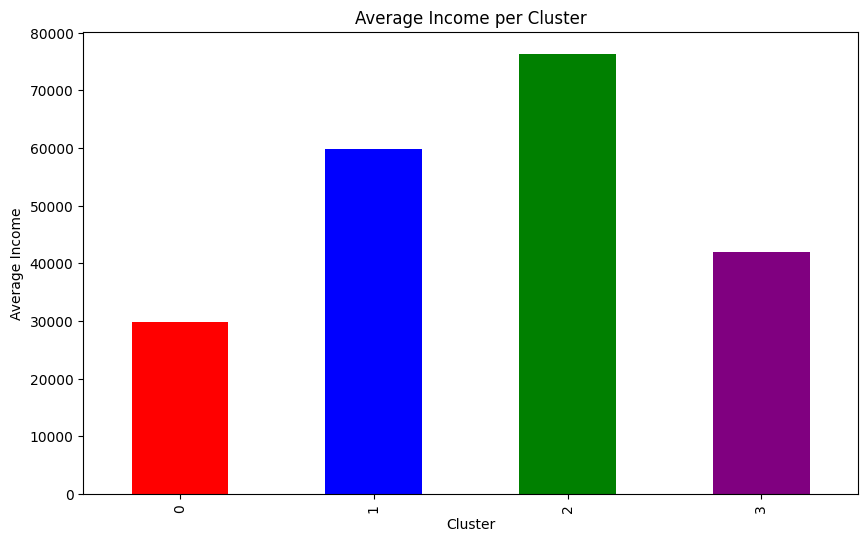

In [47]:
cluster_summary['Income'].plot(kind='bar', figsize=(10,6), color=['red', 'blue', 'green', 'purple'])
plt.xlabel("Cluster")
plt.ylabel("Average Income")
plt.title("Average Income per Cluster")
plt.show()
